# Import Libraries

In [1]:
#top2vec 알고리즘 설치
!pip install top2vec[sentence_encoders]

     |████████████████████████████████| 5.2 MB 5.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 4.9 MB 48.9 MB/s 
     |████████████████████████████████| 1.1 MB 51.8 MB/s 
     |████████████████████████████████| 462 kB 75.1 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330881 sha256=792d7e9b46ac04a8c70f1acc168e5af32cccfc6de86af9c34ce86d7c80427f20
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=4119870f993d458c4455a9e3148ccccbcc5188cf1d2b9382da0fcc81df91dbd4
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndes

In [4]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec
np.random.seed(0)

# Read the Data

In [5]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset = 'all',
                                remove = ('headers','footers','quotes'))


In [6]:
print(len(newsgroups.data))

18846


# Trainin a Top2Vec Model

In [8]:
from top2vec import Top2Vec

#the model will be trained with Doc2Vec embeddings by default.
model = Top2Vec(newsgroups.data, workers = 4, embedding_model = 'universal-sentence-encoder')


2022-03-10 11:53:49,250 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-10 11:54:00,937 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-03-10 11:54:19,183 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-10 11:57:04,168 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

# Viewing the Number of Topics

In [9]:
#102개의 토픽이 발견

model.get_num_topics()

102

# Getting Keywords for Each Topic

In [10]:
#토픽 벡터와 가까운 단어 벡터들을 의미
#one topic has the word list

model.topic_words

array([['recchi', 'potvin', 'nyr', ..., 'pittsburgh', 'binghamton',
        'pitt'],
       ['diagnosed', 'symptoms', 'diagnosis', ..., 'std', 'admitted',
        'tested'],
       ['spacecraft', 'jpl', 'orbiter', ..., 'sphere', 'convention',
        'comet'],
       ...,
       ['illinois', 'uiuc', 'cmu', ..., 'exe', 'scientific', 'michigan'],
       ['vice', 'bay', 'pacific', ..., 'ships', 'atomic', 'ship'],
       ['armenians', 'ankara', 'armenian', ..., 'discussed',
        'azerbaijani', 'whom']], dtype='<U15')

In [22]:
#0번째 토픽의 관련 단어들
model.topic_words[0]

array(['recchi', 'potvin', 'nyr', 'nyi', 'lemieux', 'lindros', 'nhl',
       'phillies', 'defenseman', 'mets', 'ahl', 'jagr', 'bruins',
       'sabres', 'cubs', 'gretzky', 'alomar', 'pitchers', 'pitching',
       'clemens', 'canucks', 'inning', 'henrik', 'innings', 'yankees',
       'oilers', 'islanders', 'utica', 'boswell', 'braves', 'hockey',
       'rangers', 'leafs', 'flyers', 'sox', 'wpg', 'playoffs', 'baseball',
       'dodgers', 'espn', 'goalie', 'fuhr', 'playoff', 'ulf', 'hawks',
       'batting', 'tampa', 'pittsburgh', 'binghamton', 'pitt'],
      dtype='<U15')

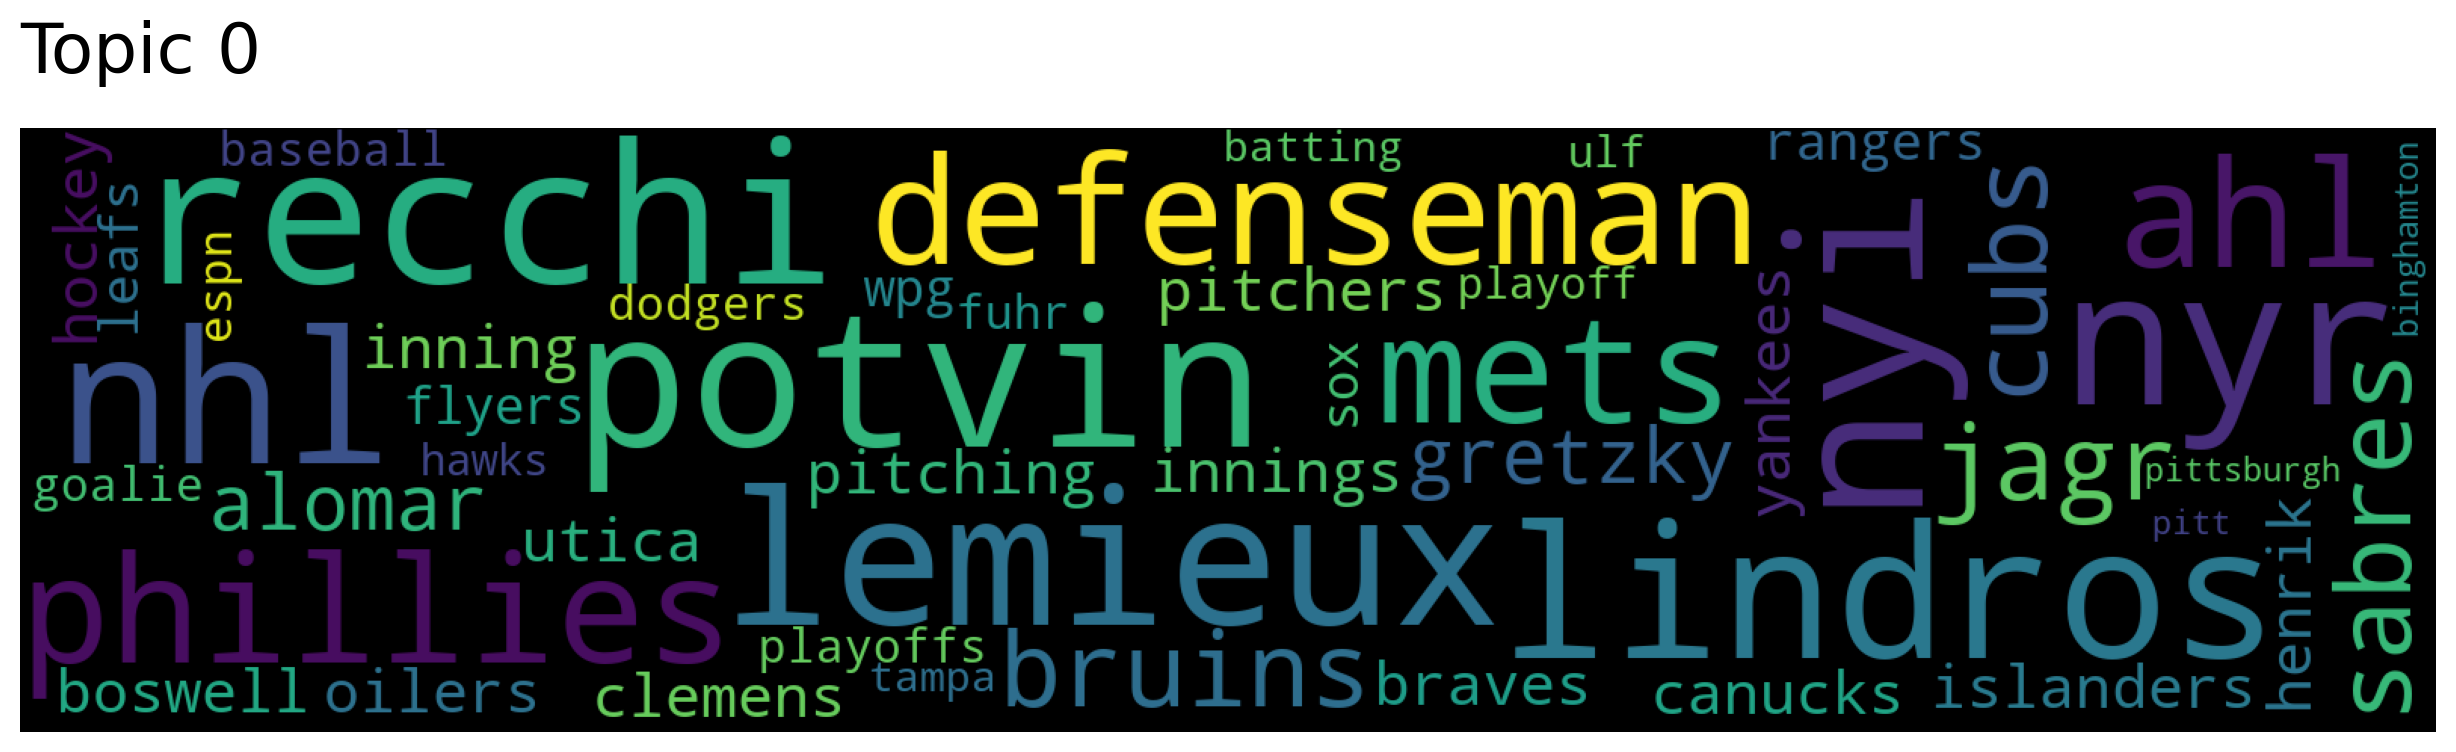

In [14]:
#토픽 벡터 주변의 단어들 중에서 자주 출현한 단어들
model.generate_topic_wordcloud(0)

# Accessing Topic Vectors

In [20]:
model.topic_vectors.shape

(102, 512)

In [23]:
embedding_vector = model.embed(["This is a fake news article."])
embedding_vector.shape

TensorShape([1, 512])

# Searching for Topics by Keyword

In [45]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], num_topics=3)

In [44]:
topic_words #토픽 키워드

[array(['um', 'ci', 'oo', 'll', 'ye', 'hmm', 'un', 'uh', 'y_', 'wt', 'on',
        'uu', 'actually', 'an', 'eh', 'way', 'des', 'er', 'se', 'not',
        'has', 'huh', 'of', 'ya', 'so', 'it', 'in', 'le', 'upon', 'hm',
        'one', 'is', 'es', 'ne', 'at', 'what', 'no', 'au', 'est', 'shut',
        'mm', 'got', 'dont', 'lo', 'tu', 'en', 'the', 'have', 'am',
        'there'], dtype='<U15'),
 array(['serbs', 'bosnian', 'bosnia', 'yugoslavia', 'armenians', 'kurds',
        'kurdish', 'moslems', 'turkiye', 'azeri', 'turks', 'azeris',
        'ottoman', 'massacres', 'moslem', 'azerbaijanis', 'armenian',
        'genocide', 'karabakh', 'armenia', 'muslims', 'iraq', 'turkish',
        'ankara', 'azerbaijani', 'turk', 'muslim', 'ethnic', 'baku',
        'refugees', 'cyprus', 'secular', 'azerbaijan', 'nations',
        'holocaust', 'davidians', 'atrocities', 'greeks', 'osf', 'syria',
        'unified', 'islam', 'conflict', 'tartars', 'islamic', 'bombing',
        'istanbul', 'extermination', 's

In [27]:
word_scores

[array([0.4755734 , 0.39448005, 0.34567672, 0.31879053, 0.31028008,
        0.29657793, 0.27994412, 0.2749325 , 0.26741037, 0.2626282 ,
        0.25506186, 0.24818978, 0.24543062, 0.23754954, 0.22973701,
        0.22699161, 0.22599664, 0.22575381, 0.22075045, 0.20924188,
        0.2079297 , 0.2005354 , 0.2004331 , 0.20017013, 0.19839305,
        0.19720316, 0.19653144, 0.19642293, 0.19636133, 0.1963085 ,
        0.1961142 , 0.19384764, 0.19289115, 0.19160375, 0.18985507,
        0.18905573, 0.18803863, 0.18457164, 0.18253514, 0.18213348,
        0.18162219, 0.18131277, 0.1801284 , 0.17979234, 0.17867664,
        0.1776517 , 0.17725912, 0.17689636, 0.17678222, 0.17605513],
       dtype=float32),
 array([0.61790776, 0.5879094 , 0.5860362 , 0.58259344, 0.5807849 ,
        0.57958287, 0.57231826, 0.56879103, 0.56759524, 0.5582521 ,
        0.55051583, 0.5470464 , 0.54694307, 0.54686344, 0.5452013 ,
        0.5425382 , 0.541607  , 0.5412705 , 0.5383264 , 0.5365279 ,
        0.53532046, 0.53

In [28]:
topic_scores

array([0.22973702, 0.21416646, 0.18762642])

In [30]:
topic_nums

array([45,  5, 49])

# Searching for Documents by Topic

토픽에 해당하는 docs들을 검색 가능

In [47]:
#원하는 topic, 검색하고자 하는 문서의 수
model.search_documents_by_topic(101, num_docs = 2)

(array(['Accounts of Anti-Armenian Human Right Violations in Azerbaijan #015\n                 Prelude to Current Events in Nagorno-Karabakh\n\n         +-----------------------------------------------------------+\n         |                                                           |\n         | . . . They beat up the husband, dragged the wife outside, |\n         | and stood her naked next to our burning things; her       | \n         | husband was lying at her feet on the ground. The crowd    |\n         | shouted, "Look at the naked Armenian!" They were going to |\n         | throw the poor woman into the fire...Mamma wouldn\'t allow |\n         | it but I went to the window and saw her standing there,   |\n         | and they took skewers that had been heated in the fire    |\n         | and stuck them into her body.                             |\n         |                                                           |\n         +----------------------------------------------------

# Reducing the Number of Topics
논문에서 나왔듯이 유사한 토픽간 합쳐서 토픽의 개수를 위계적으로 줄일 수 있다.

In [36]:
#본래 데이터가 20개의 카테고리로 범주화 되어 있기 때문에 하이퍼 파라미터로 20을 지정

topic_mapping = model.hierarchical_topic_reduction(num_topics = 20)

In [37]:
model.topic_words_reduced[1]

array(['xterm', 'bitmap', 'truetype', 'ansi', 'postscript', 'fprintf',
       'ascii', 'msdos', 'programs', 'printf', 'implementations', 'gui',
       'bmp', 'borland', 'obfuscated', 'program', 'gnu', 'font', 'raster',
       'unix', 'exe', 'fortran', 'binaries', 'toolkits', 'jpg', 'aix',
       'byte', 'compile', 'risc', 'sgi', 'shareware', 'argv', 'viewer',
       'telnet', 'dir', 'converter', 'bsd', 'tiff', 'qt', 'gfx',
       'graphical', 'algorithm', 'format', 'freeware', 'dpi',
       'quantization', 'jpeg', 'xt', 'fonts', 'stderr'], dtype='<U15')